# **1. INTRODUCTION**
**Dataset**    : Lazada App Reviews from Google Store  
**Objective**   : *This dataset discusses Reviews on the Lazada Application from the Google Store. Where this data contains comments or user feedback when they use the application. Some of this user feedback provides negative, neutral, or positive feedback. The purpose of this feedback is to find out how the user experience is in using this application. By knowing this feedback, we can find out what needs to be developed for this lazada application and adjusted to the user's wishes.*

*The purpose of this modeling is to find out the sentiment by entering a new sentence. Where by entering this new sentence, it will be immediately predicted whether this feedback is negative, neutral, or positive feedback. The usefulness of this predict is that we can collect feedback data to find out whether users like this application or not.*

# **2. IMPORT LIBRARIES**

In [106]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
# import tensorflow_hub as tf_hub
import time
import json
from tensorflow import keras
from keras.utils import to_categorical
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, GRU, Dropout, Reshape, Embedding, SimpleRNN, GRU, SpatialDropout1D, TextVectorization
from keras.optimizers import Adam
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# **3. DATA LOADING**

In [2]:
df = pd.read_csv('LAZADA_REVIEWS.csv')
df

,Unnamed: 0,review_text,review_rating,author_id,author_name,author_app_version,review_datetime_utc,review_likes
0,0,This app is a big step in right direction - gr...,5,109329*********902682,A Google user,1.0,2013-06-09T08:34:37.000Z,2
1,1,This is what I have been looking for. Now I ca...,5,109886*********190000,A Google user,1.0,2013-06-09T09:29:25.000Z,0
2,2,Its a great way of shopping online. But please...,1,114358*********899063,A Google user,1.0,2013-06-09T10:19:39.000Z,0
3,3,Thanks lazada for this app!!,5,108006*********600292,A Google user,1.0,2013-06-10T02:24:14.000Z,0
4,4,Good app ;),5,110676*********237626,A Google user,1.0,2013-06-10T02:35:53.000Z,0
...,...,...,...,...,...,...,...,...
775318,775318,nice,5,105611*********908291,A Google user,NaN,2023-11-13T14:35:46.000Z,0
775319,775319,Nice,5,108460*********801893,A Google user,7.37.0,2023-11-13T14:39:25.000Z,0
775320,775320,thanks super sulit,5,109168*********063517,A Google user,NaN,2023-11-13T14:41:47.000Z,0
775321,775321,1 of the best online shopping app because of t...,5,112557*********329849,A Google user,7.37.0,2023-11-13T14:44:35.000Z,0


# **4. EXPLORATORY DATA ANALYSIS (EDA)**

**1. Explorasi Data**

In [3]:
# Check missing Value
df.isna().sum()

Unnamed: 0                  0
review_text               305
review_rating               0
author_id                 128
author_name                 1
author_app_version     174411
review_datetime_utc         0
review_likes                0
dtype: int64

In [4]:
# Check Distribution of Dataset

df.value_counts()

Unnamed: 0  review_text                                                                                                                                                                                                                                                                                                                                           review_rating  author_id              author_name    author_app_version  review_datetime_utc       review_likes
0           This app is a big step in right direction - great overview of products in Lazada assortment. Electronics, mobiles, cameras, kids & baby, books - all in one solid app. Really appreciate the high frequency of cheap prices and strong promotions. Interface is really good and clean. Looking forward to see Lazada go deeper and faster in mobile!  5              109329*********902682  A Google user  1.0                 2013-06-09T08:34:37.000Z  2               1
510081      Good promotion                                     

**2. Data Visualization**

`1. Wordcloud`
> Wordcloud memiliki kegunaan untuk melihat representasi text secara visual. Kata-kata dalam word cloud biasanya merupakan kata tunggal, dan pentingnya setiap kata ditunjukkan melalui ukuran font atau warna. Format ini berguna untuk cepat memahami istilah-istilah yang paling sering muncul untuk menentukan kepentingan dari kalimat tersebut. Dalam word cloud, ukuran setiap kata menunjukkan frekuensi atau kepentingannya: semakin besar dan tebal kata tersebut muncul, semakin sering kata itu disebutkan dalam teks yang diberikan, semakin menonjol pula kata tersebut.
>
> Dalam proses ini, akan dilihat kata apa saja yang paling sering muncul. Hal ini berguna untuk melihat seberapa related kata tersebut. Jika kata yang sering muncul tersebut ternyata tidak diperlukan, maka dapat dimasukan ke dalam stopwords agar terhindar dari bias.

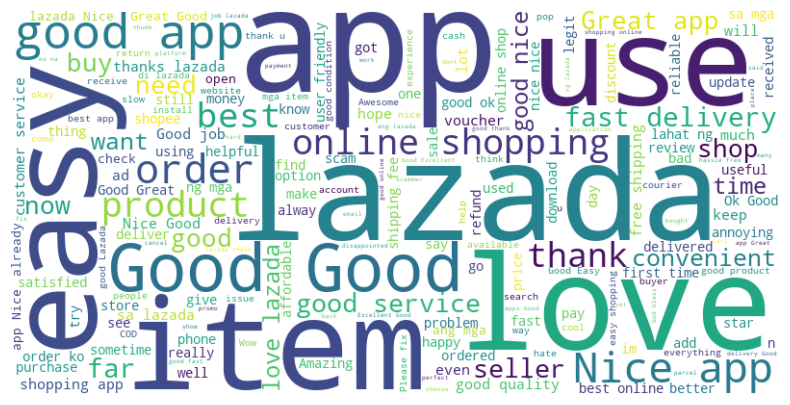

In [9]:
# WordCloud Distribution
from wordcloud import WordCloud
text_data = df['review_text'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

>Berdasarkan dari hasil wordcloud, Kata 'Lazada' dan 'app', maka perlu dimasukan ke dalam stopwords. Karena pada analisa memang, kita sudah tau bahwa aplikasi yang akan kita lakukan rating review adalah aplikasi Lazada. Dan kata 'app' juga perlu dimasukan ke dalam stopwords, karena kita sudah tau bahwa yang akan kita review adalah aplikasi. 

`2. Reviews Length Distribution`
> untuk mengetahui seberapa panjang teks yang ditulis pengguna dalam ulasan mereka. Hal ini bisa memberikan wawasan mengenai tingkat keterlibatan dan usaha yang pengguna berikan ketika memberikan ulasan. Ulasan yang panjang bisa menandakan bahwa pengguna tersebut sangat terdorong untuk berbagi pengalaman mereka secara detail, baik itu karena pengalaman yang sangat positif atau sangat negatif.
>
> Berdasarkan dari hasil visualisasi histogram, didapatkan bahwa kebanyakan user menulis lebih dari 8000 kata, yang menandakan bahwa user/pengguna tersebut sangat terdorong untuk memberikan feedback secara detail.

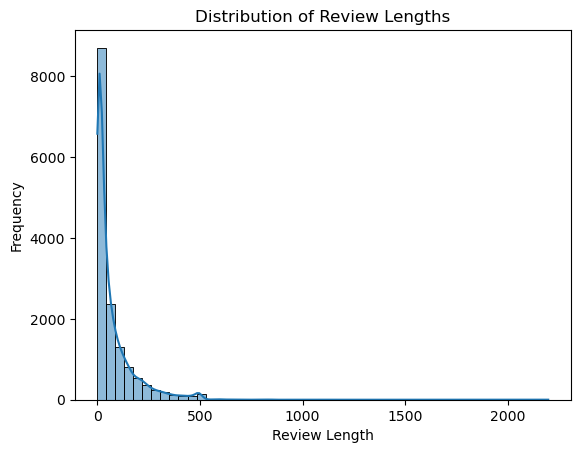

In [98]:
# Calculate review lengths
df['review_length'] = df['review_text'].apply(len)

# Plot the distribution of review lengths
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


`3. Like Distribution`
> untuk memahami seberapa sering ulasan mendapat tanggapan positif dari pengguna lain. Dengan menganalisis distribusi ini, kita dapat mengetahui apakah ada ulasan tertentu yang menonjol karena banyaknya 'likes' yang diterima, yang dapat mengindikasikan bahwa ulasan tersebut sangat resonan dengan pengalaman atau pendapat pengguna lain.

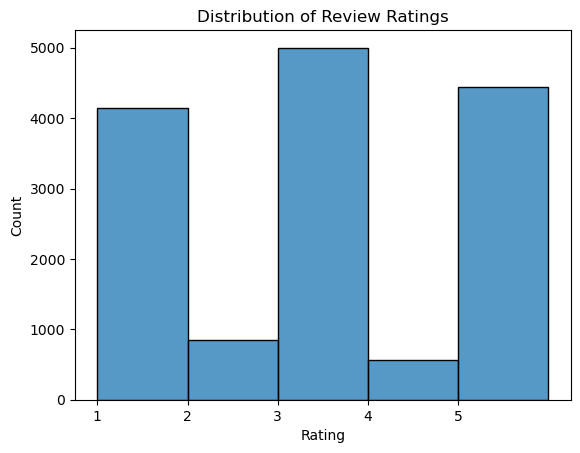

In [101]:
# Assuming 'df' is your dataframe and 'review_rating' is the column with review ratings
sns.histplot(df['review_rating'], bins=[1, 2, 3, 4, 5, 6], kde=False)
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.xticks(range(1, 6))  # Set x-ticks to be the integer ratings
plt.ylabel('Count')
plt.show()

# **5. FEATURE ENGINEERING**

In [10]:
# copy
df = df.copy()

### ***Data Cleaning***


**- Check is Duplicated**

In [11]:
df.duplicated().sum()

0

**- Cleaning Missing Value**

In [103]:
# Assume df is your DataFrame
df.dropna(inplace=True)
df.isna().sum()

Unnamed: 0             0
review_text            0
review_rating          0
author_id              0
author_name            0
author_app_version     0
review_datetime_utc    0
review_likes           0
date                   0
time                   0
year                   0
sentiment              0
text_processed         0
review_length          0
dtype: int64

**- Balancing Data**

`a. Change value rating to 3 parameter`

In [14]:
def rating_to_sentiment(rating):
    if rating in [1, 2]:
        return -1  # Negative
    elif rating == 3:
        return 0   # Neutral
    elif rating in [4, 5]:
        return 1   # Positive

In [15]:
df['sentiment'] = df['review_rating'].apply(rating_to_sentiment)

`b. Undersampling Data`

In [16]:
# Balancing df
df_0 = df[df['sentiment'] == -1].reset_index(drop=True)
df_1 = df[df['sentiment'] == 0].reset_index(drop=True)
df_2 = df[df['sentiment'] == 1].reset_index(drop=True)

df_0 = df_0.sample(5000).reset_index(drop=True)
df_1 = df_1.sample(5000).reset_index(drop=True)
df_2 = df_2.sample(5000).reset_index(drop=True)

df = pd.concat([df_0, df_1, df_2], axis=0).reset_index(drop=True)

df

,Unnamed: 0,review_text,review_rating,author_id,author_name,author_app_version,review_datetime_utc,review_likes,date,time,year,sentiment
0,348127,Very poor service!,1,110069*********803648,A Google user,6.43.0,2020-03-13 22:02:09+00:00,0,2020-03-13,22:02:09,2020,-1
1,627312,The delivery is slow or not coming at all. The...,1,105350*********956093,Je**********o,6.92.1,2022-01-20 06:07:20+00:00,17,2022-01-20,06:07:20,2022,-1
2,317151,Pakyu ads pa,1,112243*********225685,A Google user,6.39.1,2019-12-20 12:38:47+00:00,0,2019-12-20,12:38:47,2019,-1
3,449851,I order many times in lazada for cod but alway...,1,116344*********560728,A Google user,6.59.0,2020-12-02 23:06:43+00:00,0,2020-12-02,23:06:43,2020,-1
4,157531,Every time I go back to the product list from ...,1,108441*********161777,A Google user,6.28.1,2019-03-16 21:28:21+00:00,0,2019-03-16,21:28:21,2019,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,742791,Easy to use. Show relevant goods.,5,111444*********649406,Su**********************k,7.23.3,2023-04-19 17:53:33+00:00,0,2023-04-19,17:53:33,2023,1
14996,722588,so much love for lazada almost all I ordered w...,5,106951*********529402,Ma************l,7.11.1,2023-01-01 23:35:20+00:00,1,2023-01-01,23:35:20,2023,1
14997,282493,Nice,5,104847*********721007,A Google user,6.35.100.1,2019-11-10 11:22:56+00:00,0,2019-11-10,11:22:56,2019,1
14998,590292,"sobrang ganda ng lazada,ang bilis dumating ng ...",5,113389*********518941,Ri**********i,6.84.2,2021-10-14 06:54:53+00:00,0,2021-10-14,06:54:53,2021,1


**- Taking Column review_text and sentiment only**

`Text processing`

In [17]:
# Download Stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leede\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Define Stopwords
## Load Stopwords from NLTK
from nltk.corpus import stopwords
stop_words_en = stopwords.words("english")

print('Stopwords from NLTK')
print(len(stop_words_en), stop_words_en)
print('')

## Create A New Stopwords
new_stop_words = ['lazada', 'app','Lazada']

## Merge Stopwords
stop_words_en = stop_words_en + new_stop_words
stop_words_en = list(set(stop_words_en))
print('Out Final Stopwords')
print(len(stop_words_en), stop_words_en)

Stopwords from NLTK
179 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',

In [19]:
from collections import Counter

def clean_text(text, stopwords_list):
    tokens = word_tokenize(text.lower())
    words = [word for word in tokens if word.isalpha()]
    words = [word for word in words if word not in stopwords_list]
    return words

# Ensure that review_text is of string type
df['review_text'] = df['review_text'].astype(str)

# Concatenating all the text in the review_text column
text_data = df['review_text'].str.lower().str.cat(sep=' ')

# Membersihkan teks dan mendapatkan list kata-kata
cleaned_words = clean_text(text_data, stop_words_en)

# Menghitung kata-kata yang paling sering muncul
word_counts = Counter(cleaned_words)
most_common = word_counts.most_common(10)  # Mengambil 10 kata yang paling sering muncul

# Menampilkan kata-kata yang paling sering muncul
print("Kata yang paling banyak muncul dalam topik:")
print(most_common)

# Menghitung kata-kata yang paling jarang muncul
least_common = word_counts.most_common()[:-11:-1]  # Mengambil 10 kata yang paling sedikit muncul

# Menampilkan kata-kata yang paling jarang muncul
print("\nKata yang paling sedikit muncul dalam topik:")
print(least_common)

Kata yang paling banyak muncul dalam topik:
[('good', 2569), ('order', 1143), ('na', 1065), ('delivery', 939), ('item', 843), ('sa', 786), ('ng', 778), ('nice', 775), ('items', 765), ('ok', 673)]

Kata yang paling sedikit muncul dalam topik:
[('mandurugas', 1), ('mapadukan', 1), ('huii', 1), ('bitin', 1), ('okiiii', 1), ('thumbscup', 1), ('contribution', 1), ('smile', 1), ('expresive', 1), ('alrdy', 1)]


In [20]:
nltk.download('wordnet')
# Inisialisasi WordNetLemmatizer
stemmer = PorterStemmer()
# Function for text preprocessing
def text_preprocessing(text):
    # Case folding
    text = text.lower()

    # Mention, hashtag, newline, URL, and non-letter removal
    text = re.sub("@[A-Za-z0-9_]+", " ", text)
    text = re.sub("#[A-Za-z0-9_]+", " ", text)
    text = re.sub(r"\\n", " ", text)
    text = re.sub(r"http\S+|www.\S+", " ", text)
    text = re.sub("[^A-Za-z\s']", " ", text)

    # Tokenization
    tokens = word_tokenize(text)

    # Stopwords removal
    tokens = [word for word in tokens if word not in stop_words_en]

    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]

    # Combining Tokens
    text = ' '.join(tokens)

    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\leede\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
# Applying Text Preprocessing to the DataFrame
df['text_processed'] = df['review_text'].apply(lambda x: text_preprocessing(x))
df

,Unnamed: 0,review_text,review_rating,author_id,author_name,author_app_version,review_datetime_utc,review_likes,date,time,year,sentiment,text_processed
0,348127,Very poor service!,1,110069*********803648,A Google user,6.43.0,2020-03-13 22:02:09+00:00,0,2020-03-13,22:02:09,2020,-1,poor servic
1,627312,The delivery is slow or not coming at all. The...,1,105350*********956093,Je**********o,6.92.1,2022-01-20 06:07:20+00:00,17,2022-01-20,06:07:20,2022,-1,deliveri slow come deliveri fee expens costum ...
2,317151,Pakyu ads pa,1,112243*********225685,A Google user,6.39.1,2019-12-20 12:38:47+00:00,0,2019-12-20,12:38:47,2019,-1,pakyu ad pa
3,449851,I order many times in lazada for cod but alway...,1,116344*********560728,A Google user,6.59.0,2020-12-02 23:06:43+00:00,0,2020-12-02,23:06:43,2020,-1,order mani time cod alway fail deliveri give s...
4,157531,Every time I go back to the product list from ...,1,108441*********161777,A Google user,6.28.1,2019-03-16 21:28:21+00:00,0,2019-03-16,21:28:21,2019,-1,everi time go back product list view product r...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,742791,Easy to use. Show relevant goods.,5,111444*********649406,Su**********************k,7.23.3,2023-04-19 17:53:33+00:00,0,2023-04-19,17:53:33,2023,1,easi use show relev good
14996,722588,so much love for lazada almost all I ordered w...,5,106951*********529402,Ma************l,7.11.1,2023-01-01 23:35:20+00:00,1,2023-01-01,23:35:20,2023,1,much love almost order perfectli given well pa...
14997,282493,Nice,5,104847*********721007,A Google user,6.35.100.1,2019-11-10 11:22:56+00:00,0,2019-11-10,11:22:56,2019,1,nice
14998,590292,"sobrang ganda ng lazada,ang bilis dumating ng ...",5,113389*********518941,Ri**********i,6.84.2,2021-10-14 06:54:53+00:00,0,2021-10-14,06:54:53,2021,1,sobrang ganda ng ang bili dumat ng mga order s...


In [22]:
X = df['text_processed']
y = df['sentiment']

In [23]:
# df Splitting

X_train_val, X_test, y_train_val, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.15,
                                                    random_state=20,
                                                    stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (11475,)
Val Size   :  (1275,)
Test Size  :  (2250,)


In [24]:
# Change Target to One Hot Encoding

y_train_ohe = to_categorical(y_train, 3)
y_val_ohe = to_categorical(y_val, 3)
y_test_ohe = to_categorical(y_test, 3)

Model building

In [25]:
# Get Vocabularies

Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<11475x9693 sparse matrix of type '<class 'numpy.int64'>'
	with 83610 stored elements in Compressed Sparse Row format>

In [26]:
# Finding the Number of Vocabs and Max Token Length in One Document

total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(doc.split(" ")) for doc in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  9693
Maximum Sentence Length :  209 tokens


In [84]:
# Text Vectorization
text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(X_train)

Word Embedding

In [29]:
# Embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

In [69]:
# Example Result

## Document example
print('Document example')
print(df.text_processed[0])
print('')

## Result of Text Vectorization
print('Result of  Text Vectorization')
print(text_vectorization([df.text_processed[0]]))
print('Vector size : ', text_vectorization([df.text_processed[0]]).shape)
print('')

## Result of  Embedding
print('Result of  Embedding')
print(embedding(text_vectorization([df.text_processed[0]])))
print('Vector size : ', embedding(text_vectorization([df.text_processed[0]])).shape)

Document example
poor servic

Result of  Text Vectorization
tf.Tensor(
[[181  20   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]], shape=(1, 209), dtype=int64)
Vector size :  (1, 209)

Result of  E

# **6. Model Definition**

### 1. SIMPLE RNN

`Simple RNN 1`

In [78]:
%%time
# Model Training using LSTM
## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_rnn = Sequential()
model_rnn.add(text_vectorization)
model_rnn.add(embedding)
# Using return_sequences=True in the first SimpleRNN layer to pass sequence to the next RNN layer
model_rnn.add(SimpleRNN(16, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_rnn.add(Dropout(0.3))
# Last RNN layer does not need to return sequences as the next layer is Dense
model_rnn.add(SimpleRNN(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(3, activation='softmax'))

model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 209)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 209, 128)          1240704   
                                                                 
 simple_rnn (SimpleRNN)      (None, 209, 16)           2320      
                                                                 
 dropout (Dropout)           (None, 209, 16)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                        

`Simple RNN 2`

In [32]:
%%time
# Model Training using LSTM
## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_rnn1 = Sequential()
model_rnn1.add(text_vectorization)
model_rnn1.add(embedding)
# Using return_sequences=True in the first SimpleRNN layer to pass sequence to the next RNN layer
model_rnn1.add(SimpleRNN(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_rnn1.add(Dropout(0.3))
model_rnn1.add(SimpleRNN(24, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_rnn1.add(Dropout(0.2))
model_rnn1.add(SimpleRNN(16, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_rnn1.add(Dropout(0.2))
# Last RNN layer does not need to return sequences as the next layer is Dense
model_rnn1.add(SimpleRNN(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_rnn1.add(Dropout(0.2))
model_rnn1.add(Dense(3, activation='softmax'))

model_rnn1.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
model_rnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 209)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 209, 128)          1240704   
                                                                 
 simple_rnn (SimpleRNN)      (None, 209, 32)           5152      
                                                                 
 dropout (Dropout)           (None, 209, 32)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 209, 24)           1368      
                                                                 
 dropout_1 (Dropout)         (None, 209, 24)           0         
                                                        

### 2. LSTM

`LSTM 1`

In [33]:
%%time
# Model Training using LSTM
## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_1 = Sequential()
model_lstm_1.add(text_vectorization)
model_lstm_1.add(embedding)
model_lstm_1.add(Bidirectional(LSTM(16, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(Dropout(0.3))
model_lstm_1.add(Bidirectional(LSTM(16, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))  # Changed to return_sequences=True
model_lstm_1.add(Dropout(0.2))
model_lstm_1.add(Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))  # return_sequences can be False here as this is the last LSTM layer
model_lstm_1.add(Dropout(0.2))
model_lstm_1.add(Dense(3, activation='softmax'))

model_lstm_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
model_lstm_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 209)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 209, 128)          1240704   
                                                                 
 bidirectional (Bidirection  (None, 209, 32)           18560     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 209, 32)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 209, 32)           6272      
 onal)                                                           
                                                        

`LSTM 2`

In [34]:
%%time
# Model Training using LSTM
## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_2 = Sequential()
model_lstm_2.add(text_vectorization)
model_lstm_2.add(embedding)
model_lstm_2.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.4))
model_lstm_2.add(Bidirectional(LSTM(32, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.4))
model_lstm_2.add(Dense(3, activation='softmax'))

model_lstm_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
model_lstm_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 209)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 209, 128)          1240704   
                                                                 
 bidirectional (Bidirection  (None, 209, 64)           41216     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 209, 64)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                        

`LSTM 3 With L1 L2`

In [35]:
%%time
# Model Training using LSTM
## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_3 = Sequential()
model_lstm_3.add(text_vectorization)
model_lstm_3.add(embedding)
model_lstm_3.add(SpatialDropout1D(0.2))  # Spatial dropout can be more effective for sequence data
model_lstm_3.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed), dropout=0.1)))
model_lstm_3.add(Bidirectional(LSTM(24, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed), dropout=0.1)))
model_lstm_3.add(Bidirectional(LSTM(16, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed), dropout=0.1)))
model_lstm_3.add(Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed), dropout=0.4, recurrent_dropout=0.1)))
model_lstm_3.add(Dense(3, activation='softmax', kernel_regularizer=l1_l2(l1=0.05, l2=0.05)))

# Using Adam optimizer with a lower learning rate
adam_optimizer = Adam(learning_rate=0.0005)
model_lstm_3.compile(loss='categorical_crossentropy', optimizer=adam_optimizer, metrics='accuracy')
model_lstm_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 209)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 209, 128)          1240704   
                                                                 
 spatial_dropout1d (Spatial  (None, 209, 128)          0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 209, 64)           41216     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 209, 48)           17088     
 onal)                                                  

`LSTM 4`

In [94]:
%%time
# Model Training using LSTM
## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_4 = Sequential()
model_lstm_4.add(text_vectorization)
model_lstm_4.add(embedding)
model_lstm_4.add(SpatialDropout1D(0.1))  # Spatial dropout can be more effective for sequence data
model_lstm_4.add(Bidirectional(LSTM(16, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed), dropout=0.2)))
model_lstm_4.add(Bidirectional(LSTM(16, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed), dropout=0.1)))
model_lstm_4.add(Bidirectional(LSTM(16, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed), dropout=0.2)))
model_lstm_4.add(Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed), dropout=0.2)))
model_lstm_4.add(Dense(3, activation='softmax', kernel_regularizer=l1_l2(l1=0.05, l2=0.03)))

# Using Adam optimizer with a lower learning rate
adam_optimizer = Adam(learning_rate=0.0001)
model_lstm_4.compile(loss='categorical_crossentropy', optimizer=adam_optimizer, metrics='accuracy')
model_lstm_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 209)               0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 209, 128)          1240704   
                                                                 
 spatial_dropout1d (Spatial  (None, 209, 128)          0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 209, 32)           18560     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 209, 32)           6272      
 onal)                                                  

### 3. GRU

`GRU 1`

In [36]:
%%time
# Model Training using LSTM
## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_gru = Sequential()
model_gru.add(text_vectorization)
model_gru.add(embedding)
# Using return_sequences=True in the first GRU layer to pass sequence to the next RNN layer
model_gru.add(GRU(16, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_gru.add(Dropout(0.2))
# Last GRU layer does not need to return sequences as the next layer is Dense
model_gru.add(GRU(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(3, activation='softmax'))

model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 209)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 209, 128)          1240704   
                                                                 
 gru (GRU)                   (None, 209, 16)           7008      
                                                                 
 dropout (Dropout)           (None, 209, 16)           0         
                                                                 
 gru_1 (GRU)                 (None, 16)                1632      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                        

`GRU 2`

In [37]:
%%time
# Model Training using LSTM
## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_gru1 = Sequential()
model_gru1.add(text_vectorization)
model_gru1.add(embedding)
# Using return_sequences=True in the first GRU layer to pass sequence to the next RNN layer
model_gru1.add(GRU(16, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_gru1.add(Dropout(0.3))
# Last GRU layer does not need to return sequences as the next layer is Dense
model_gru1.add(GRU(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_gru1.add(Dropout(0.2))
model_gru1.add(Dense(3, activation='softmax'))

model_gru1.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
model_gru1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 209)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 209, 128)          1240704   
                                                                 
 gru (GRU)                   (None, 209, 16)           7008      
                                                                 
 dropout (Dropout)           (None, 209, 16)           0         
                                                                 
 gru_1 (GRU)                 (None, 16)                1632      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                        

# 7. Model Training

### 1. Simple RNN

`Simple RNN 1 Training`

In [79]:
# Training the model
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001),
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('model_lstm_1', monitor='val_loss', save_best_only=True)
]
rnn_hist = model_rnn.fit(X_train, y_train_ohe, epochs=30, batch_size=125, validation_data=(X_val, y_val_ohe),callbacks=callbacks)

Epoch 1/30


92/92 [==============================] - ETA: 0s - loss: 1.0615 - accuracy: 0.4366INFO:tensorflow:Assets written to: model_lstm_1\assets


INFO:tensorflow:Assets written to: model_lstm_1\assets


92/92 [==============================] - 60s 609ms/step - loss: 1.0615 - accuracy: 0.4366 - val_loss: 0.9691 - val_accuracy: 0.5137 - lr: 0.0010
Epoch 2/30
92/92 [==============================] - ETA: 0s - loss: 0.9073 - accuracy: 0.5679INFO:tensorflow:Assets written to: model_lstm_1\assets


INFO:tensorflow:Assets written to: model_lstm_1\assets


92/92 [==============================] - 57s 620ms/step - loss: 0.9073 - accuracy: 0.5679 - val_loss: 0.9512 - val_accuracy: 0.5529 - lr: 0.0010
Epoch 3/30
92/92 [==============================] - 53s 578ms/step - loss: 0.8347 - accuracy: 0.6212 - val_loss: 0.9709 - val_accuracy: 0.5584 - lr: 0.0010
Epoch 4/30
92/92 [==============================] - 53s 578ms/step - loss: 0.7933 - accuracy: 0.6527 - val_loss: 0.9737 - val_accuracy: 0.5529 - lr: 0.0010
Epoch 5/30
92/92 [==============================] - 51s 556ms/step - loss: 0.7439 - accuracy: 0.6912 - val_loss: 0.9845 - val_accuracy: 0.5678 - lr: 0.0010


`Simple RNN 2 Training`

In [ ]:
rnn1_hist = model_rnn1.fit(X_train, y_train_ohe, epochs=30, batch_size=125, validation_data=(X_val, y_val_ohe))

Epoch 1/30
92/92 [==============================] - 38s 337ms/step - loss: 1.1371 - accuracy: 0.3852 - val_loss: 1.0510 - val_accuracy: 0.4816
Epoch 2/30
92/92 [==============================] - 29s 318ms/step - loss: 1.0749 - accuracy: 0.4402 - val_loss: 1.0467 - val_accuracy: 0.4573
Epoch 3/30
92/92 [==============================] - 30s 327ms/step - loss: 1.0243 - accuracy: 0.4844 - val_loss: 1.0360 - val_accuracy: 0.4863
Epoch 4/30
92/92 [==============================] - 29s 314ms/step - loss: 0.9787 - accuracy: 0.5134 - val_loss: 1.0504 - val_accuracy: 0.4863
Epoch 5/30
92/92 [==============================] - 29s 319ms/step - loss: 0.9256 - accuracy: 0.5532 - val_loss: 1.0532 - val_accuracy: 0.5020
Epoch 6/30
92/92 [==============================] - 29s 314ms/step - loss: 0.9022 - accuracy: 0.5579 - val_loss: 1.0837 - val_accuracy: 0.4902
Epoch 7/30
92/92 [==============================] - 29s 313ms/step - loss: 0.8731 - accuracy: 0.5861 - val_loss: 1.0669 - val_accuracy: 0.4925

### 2. LSTM

`LSTM 1 Training`

In [ ]:
# Training the model
lstm1_hist = model_lstm_1.fit(X_train, y_train_ohe, epochs=30, batch_size=125, validation_data=(X_val, y_val_ohe))

Epoch 1/30
92/92 [==============================] - 49s 529ms/step - loss: 0.6138 - accuracy: 0.7449 - val_loss: 0.8531 - val_accuracy: 0.6220
Epoch 2/30
92/92 [==============================] - 46s 500ms/step - loss: 0.5673 - accuracy: 0.7713 - val_loss: 0.8584 - val_accuracy: 0.5953
Epoch 3/30
92/92 [==============================] - 45s 485ms/step - loss: 0.5350 - accuracy: 0.7814 - val_loss: 0.9092 - val_accuracy: 0.6094
Epoch 4/30
92/92 [==============================] - 45s 492ms/step - loss: 0.5048 - accuracy: 0.7929 - val_loss: 0.9455 - val_accuracy: 0.6094
Epoch 5/30
92/92 [==============================] - 45s 488ms/step - loss: 0.4892 - accuracy: 0.7988 - val_loss: 0.9893 - val_accuracy: 0.6000
Epoch 6/30
92/92 [==============================] - 44s 482ms/step - loss: 0.4770 - accuracy: 0.8029 - val_loss: 1.0129 - val_accuracy: 0.6063
Epoch 7/30
92/92 [==============================] - 44s 474ms/step - loss: 0.4677 - accuracy: 0.8055 - val_loss: 1.0487 - val_accuracy: 0.6149

`LSTM 2 Training`

In [ ]:
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001),
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('model_lstm_1', monitor='val_loss', save_best_only=True)
]


# Training the model
lstm2_hist = model_lstm_2.fit(X_train, y_train_ohe, epochs=20, batch_size=125, validation_data=(X_val, y_val_ohe),
                              callbacks=callbacks)


Epoch 1/20
92/92 [==============================] - ETA: 0s - loss: 0.7456 - accuracy: 0.6843INFO:tensorflow:Assets written to: model_lstm_1\assets


INFO:tensorflow:Assets written to: model_lstm_1\assets


92/92 [==============================] - 119s 1s/step - loss: 0.7456 - accuracy: 0.6843 - val_loss: 0.9331 - val_accuracy: 0.6086 - lr: 0.0010
Epoch 2/20
92/92 [==============================] - 115s 1s/step - loss: 0.4795 - accuracy: 0.8040 - val_loss: 1.0252 - val_accuracy: 0.6157 - lr: 0.0010
Epoch 3/20
92/92 [==============================] - 119s 1s/step - loss: 0.4466 - accuracy: 0.8164 - val_loss: 1.1394 - val_accuracy: 0.6118 - lr: 0.0010
Epoch 4/20
92/92 [==============================] - 119s 1s/step - loss: 0.4180 - accuracy: 0.8254 - val_loss: 1.1920 - val_accuracy: 0.6047 - lr: 0.0010


`LSTM 3 Training`

In [42]:
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=0.0001),
    EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    ModelCheckpoint('model_lstm_3', monitor='val_loss', save_best_only=True)
]


# Training the model
lstm3_hist = model_lstm_3.fit(X_train, y_train_ohe, epochs=20, batch_size=180, validation_data=(X_val, y_val_ohe),
                              callbacks=callbacks)

Epoch 1/20


64/64 [==============================] - ETA: 0s - loss: 2.2084 - accuracy: 0.4338INFO:tensorflow:Assets written to: model_lstm_3\assets


INFO:tensorflow:Assets written to: model_lstm_3\assets


64/64 [==============================] - 399s 6s/step - loss: 2.2084 - accuracy: 0.4338 - val_loss: 2.0368 - val_accuracy: 0.5192 - lr: 5.0000e-04
Epoch 2/20
64/64 [==============================] - ETA: 0s - loss: 1.8785 - accuracy: 0.5664INFO:tensorflow:Assets written to: model_lstm_3\assets


INFO:tensorflow:Assets written to: model_lstm_3\assets


64/64 [==============================] - 339s 5s/step - loss: 1.8785 - accuracy: 0.5664 - val_loss: 1.7778 - val_accuracy: 0.5718 - lr: 5.0000e-04
Epoch 3/20
64/64 [==============================] - ETA: 0s - loss: 1.6240 - accuracy: 0.6207INFO:tensorflow:Assets written to: model_lstm_3\assets


INFO:tensorflow:Assets written to: model_lstm_3\assets


64/64 [==============================] - 404s 6s/step - loss: 1.6240 - accuracy: 0.6207 - val_loss: 1.5802 - val_accuracy: 0.5867 - lr: 5.0000e-04
Epoch 4/20
64/64 [==============================] - ETA: 0s - loss: 1.4157 - accuracy: 0.6702INFO:tensorflow:Assets written to: model_lstm_3\assets


INFO:tensorflow:Assets written to: model_lstm_3\assets


64/64 [==============================] - 495s 8s/step - loss: 1.4157 - accuracy: 0.6702 - val_loss: 1.4464 - val_accuracy: 0.6118 - lr: 5.0000e-04
Epoch 5/20
64/64 [==============================] - ETA: 0s - loss: 1.2599 - accuracy: 0.7018INFO:tensorflow:Assets written to: model_lstm_3\assets


INFO:tensorflow:Assets written to: model_lstm_3\assets


64/64 [==============================] - 476s 7s/step - loss: 1.2599 - accuracy: 0.7018 - val_loss: 1.3447 - val_accuracy: 0.6110 - lr: 5.0000e-04
Epoch 6/20
64/64 [==============================] - ETA: 0s - loss: 1.1510 - accuracy: 0.7139INFO:tensorflow:Assets written to: model_lstm_3\assets


INFO:tensorflow:Assets written to: model_lstm_3\assets


64/64 [==============================] - 495s 8s/step - loss: 1.1510 - accuracy: 0.7139 - val_loss: 1.2565 - val_accuracy: 0.6086 - lr: 5.0000e-04
Epoch 7/20
64/64 [==============================] - ETA: 0s - loss: 1.0447 - accuracy: 0.7399INFO:tensorflow:Assets written to: model_lstm_3\assets


INFO:tensorflow:Assets written to: model_lstm_3\assets


64/64 [==============================] - 509s 8s/step - loss: 1.0447 - accuracy: 0.7399 - val_loss: 1.1885 - val_accuracy: 0.6157 - lr: 5.0000e-04
Epoch 8/20
64/64 [==============================] - ETA: 0s - loss: 0.9654 - accuracy: 0.7581INFO:tensorflow:Assets written to: model_lstm_3\assets


INFO:tensorflow:Assets written to: model_lstm_3\assets


64/64 [==============================] - 529s 8s/step - loss: 0.9654 - accuracy: 0.7581 - val_loss: 1.1386 - val_accuracy: 0.6212 - lr: 5.0000e-04
Epoch 9/20
64/64 [==============================] - ETA: 0s - loss: 0.9123 - accuracy: 0.7663INFO:tensorflow:Assets written to: model_lstm_3\assets


INFO:tensorflow:Assets written to: model_lstm_3\assets


64/64 [==============================] - 538s 8s/step - loss: 0.9123 - accuracy: 0.7663 - val_loss: 1.1034 - val_accuracy: 0.6204 - lr: 5.0000e-04
Epoch 10/20
64/64 [==============================] - ETA: 0s - loss: 0.8752 - accuracy: 0.7697INFO:tensorflow:Assets written to: model_lstm_3\assets


INFO:tensorflow:Assets written to: model_lstm_3\assets


64/64 [==============================] - 518s 8s/step - loss: 0.8752 - accuracy: 0.7697 - val_loss: 1.0864 - val_accuracy: 0.6173 - lr: 5.0000e-04
Epoch 11/20
64/64 [==============================] - ETA: 0s - loss: 0.8418 - accuracy: 0.7793INFO:tensorflow:Assets written to: model_lstm_3\assets


INFO:tensorflow:Assets written to: model_lstm_3\assets


64/64 [==============================] - 483s 8s/step - loss: 0.8418 - accuracy: 0.7793 - val_loss: 1.0713 - val_accuracy: 0.6118 - lr: 5.0000e-04
Epoch 12/20
64/64 [==============================] - ETA: 0s - loss: 0.8140 - accuracy: 0.7860INFO:tensorflow:Assets written to: model_lstm_3\assets


INFO:tensorflow:Assets written to: model_lstm_3\assets


64/64 [==============================] - 536s 8s/step - loss: 0.8140 - accuracy: 0.7860 - val_loss: 1.0693 - val_accuracy: 0.6078 - lr: 5.0000e-04
Epoch 13/20
64/64 [==============================] - ETA: 0s - loss: 0.7992 - accuracy: 0.7850INFO:tensorflow:Assets written to: model_lstm_3\assets


INFO:tensorflow:Assets written to: model_lstm_3\assets


64/64 [==============================] - 499s 8s/step - loss: 0.7992 - accuracy: 0.7850 - val_loss: 1.0602 - val_accuracy: 0.6078 - lr: 5.0000e-04
Epoch 14/20
64/64 [==============================] - 394s 6s/step - loss: 0.7900 - accuracy: 0.7873 - val_loss: 1.0612 - val_accuracy: 0.6008 - lr: 5.0000e-04
Epoch 15/20
64/64 [==============================] - ETA: 0s - loss: 0.7751 - accuracy: 0.7943INFO:tensorflow:Assets written to: model_lstm_3\assets


INFO:tensorflow:Assets written to: model_lstm_3\assets


64/64 [==============================] - 448s 7s/step - loss: 0.7751 - accuracy: 0.7943 - val_loss: 1.0469 - val_accuracy: 0.6149 - lr: 5.0000e-04
Epoch 16/20
64/64 [==============================] - 390s 6s/step - loss: 0.7702 - accuracy: 0.7976 - val_loss: 1.0524 - val_accuracy: 0.6094 - lr: 5.0000e-04
Epoch 17/20
64/64 [==============================] - 390s 6s/step - loss: 0.7648 - accuracy: 0.7964 - val_loss: 1.0581 - val_accuracy: 0.6063 - lr: 5.0000e-04
Epoch 18/20
64/64 [==============================] - 389s 6s/step - loss: 0.7634 - accuracy: 0.8005 - val_loss: 1.0590 - val_accuracy: 0.5976 - lr: 5.0000e-04
Epoch 19/20
64/64 [==============================] - 391s 6s/step - loss: 0.7596 - accuracy: 0.7988 - val_loss: 1.0597 - val_accuracy: 0.6024 - lr: 5.0000e-04


`LSTM 4 Training`

In [49]:
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=4, min_lr=0.0001),
    EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    ModelCheckpoint('model_lstm_4', monitor='val_loss', save_best_only=True)
]


# Training the model
lstm4_hist = model_lstm_4.fit(X_train, y_train_ohe, epochs=20, batch_size=180, validation_data=(X_val, y_val_ohe),
                              callbacks=callbacks)

Epoch 1/20
64/64 [==============================] - ETA: 0s - loss: 2.3267 - accuracy: 0.3841INFO:tensorflow:Assets written to: model_lstm_4\assets


INFO:tensorflow:Assets written to: model_lstm_4\assets


64/64 [==============================] - 328s 5s/step - loss: 2.3267 - accuracy: 0.3841 - val_loss: 2.3004 - val_accuracy: 0.4376 - lr: 1.0000e-04
Epoch 2/20
64/64 [==============================] - ETA: 0s - loss: 2.2633 - accuracy: 0.4564INFO:tensorflow:Assets written to: model_lstm_4\assets


INFO:tensorflow:Assets written to: model_lstm_4\assets


64/64 [==============================] - 296s 5s/step - loss: 2.2633 - accuracy: 0.4564 - val_loss: 2.2223 - val_accuracy: 0.4706 - lr: 1.0000e-04
Epoch 3/20
64/64 [==============================] - ETA: 0s - loss: 2.1740 - accuracy: 0.5029INFO:tensorflow:Assets written to: model_lstm_4\assets


INFO:tensorflow:Assets written to: model_lstm_4\assets


64/64 [==============================] - 323s 5s/step - loss: 2.1740 - accuracy: 0.5029 - val_loss: 2.1360 - val_accuracy: 0.5051 - lr: 1.0000e-04
Epoch 4/20
64/64 [==============================] - ETA: 0s - loss: 2.0738 - accuracy: 0.5555INFO:tensorflow:Assets written to: model_lstm_4\assets


INFO:tensorflow:Assets written to: model_lstm_4\assets


64/64 [==============================] - 383s 6s/step - loss: 2.0738 - accuracy: 0.5555 - val_loss: 2.0407 - val_accuracy: 0.5498 - lr: 1.0000e-04
Epoch 5/20
64/64 [==============================] - ETA: 0s - loss: 1.9410 - accuracy: 0.6334INFO:tensorflow:Assets written to: model_lstm_4\assets


INFO:tensorflow:Assets written to: model_lstm_4\assets


64/64 [==============================] - 365s 6s/step - loss: 1.9410 - accuracy: 0.6334 - val_loss: 1.9636 - val_accuracy: 0.5820 - lr: 1.0000e-04
Epoch 6/20
64/64 [==============================] - ETA: 0s - loss: 1.8450 - accuracy: 0.6728INFO:tensorflow:Assets written to: model_lstm_4\assets


INFO:tensorflow:Assets written to: model_lstm_4\assets


64/64 [==============================] - 388s 6s/step - loss: 1.8450 - accuracy: 0.6728 - val_loss: 1.9176 - val_accuracy: 0.5976 - lr: 1.0000e-04
Epoch 7/20
64/64 [==============================] - ETA: 0s - loss: 1.7683 - accuracy: 0.7066INFO:tensorflow:Assets written to: model_lstm_4\assets


INFO:tensorflow:Assets written to: model_lstm_4\assets


64/64 [==============================] - 400s 6s/step - loss: 1.7683 - accuracy: 0.7066 - val_loss: 1.8847 - val_accuracy: 0.6102 - lr: 1.0000e-04
Epoch 8/20
64/64 [==============================] - ETA: 0s - loss: 1.7025 - accuracy: 0.7253INFO:tensorflow:Assets written to: model_lstm_4\assets


INFO:tensorflow:Assets written to: model_lstm_4\assets


64/64 [==============================] - 404s 6s/step - loss: 1.7025 - accuracy: 0.7253 - val_loss: 1.8547 - val_accuracy: 0.6039 - lr: 1.0000e-04
Epoch 9/20
64/64 [==============================] - ETA: 0s - loss: 1.6456 - accuracy: 0.7392INFO:tensorflow:Assets written to: model_lstm_4\assets


INFO:tensorflow:Assets written to: model_lstm_4\assets


64/64 [==============================] - 400s 6s/step - loss: 1.6456 - accuracy: 0.7392 - val_loss: 1.8300 - val_accuracy: 0.5969 - lr: 1.0000e-04
Epoch 10/20
64/64 [==============================] - ETA: 0s - loss: 1.5932 - accuracy: 0.7515INFO:tensorflow:Assets written to: model_lstm_4\assets


INFO:tensorflow:Assets written to: model_lstm_4\assets


64/64 [==============================] - 423s 7s/step - loss: 1.5932 - accuracy: 0.7515 - val_loss: 1.8047 - val_accuracy: 0.6000 - lr: 1.0000e-04
Epoch 11/20
64/64 [==============================] - ETA: 0s - loss: 1.5471 - accuracy: 0.7606INFO:tensorflow:Assets written to: model_lstm_4\assets


INFO:tensorflow:Assets written to: model_lstm_4\assets


64/64 [==============================] - 443s 7s/step - loss: 1.5471 - accuracy: 0.7606 - val_loss: 1.7836 - val_accuracy: 0.6047 - lr: 1.0000e-04
Epoch 12/20
64/64 [==============================] - ETA: 0s - loss: 1.5049 - accuracy: 0.7645INFO:tensorflow:Assets written to: model_lstm_4\assets


INFO:tensorflow:Assets written to: model_lstm_4\assets


64/64 [==============================] - 398s 6s/step - loss: 1.5049 - accuracy: 0.7645 - val_loss: 1.7555 - val_accuracy: 0.5976 - lr: 1.0000e-04
Epoch 13/20
64/64 [==============================] - ETA: 0s - loss: 1.4618 - accuracy: 0.7743INFO:tensorflow:Assets written to: model_lstm_4\assets


INFO:tensorflow:Assets written to: model_lstm_4\assets


64/64 [==============================] - 376s 6s/step - loss: 1.4618 - accuracy: 0.7743 - val_loss: 1.7310 - val_accuracy: 0.5898 - lr: 1.0000e-04
Epoch 14/20
64/64 [==============================] - ETA: 0s - loss: 1.4289 - accuracy: 0.7739INFO:tensorflow:Assets written to: model_lstm_4\assets


INFO:tensorflow:Assets written to: model_lstm_4\assets


64/64 [==============================] - 396s 6s/step - loss: 1.4289 - accuracy: 0.7739 - val_loss: 1.7012 - val_accuracy: 0.5953 - lr: 1.0000e-04
Epoch 15/20
64/64 [==============================] - ETA: 0s - loss: 1.3919 - accuracy: 0.7769INFO:tensorflow:Assets written to: model_lstm_4\assets


INFO:tensorflow:Assets written to: model_lstm_4\assets


64/64 [==============================] - 379s 6s/step - loss: 1.3919 - accuracy: 0.7769 - val_loss: 1.6790 - val_accuracy: 0.5867 - lr: 1.0000e-04
Epoch 16/20
64/64 [==============================] - ETA: 0s - loss: 1.3628 - accuracy: 0.7809INFO:tensorflow:Assets written to: model_lstm_4\assets


INFO:tensorflow:Assets written to: model_lstm_4\assets


64/64 [==============================] - 376s 6s/step - loss: 1.3628 - accuracy: 0.7809 - val_loss: 1.6536 - val_accuracy: 0.6008 - lr: 1.0000e-04
Epoch 17/20
64/64 [==============================] - ETA: 0s - loss: 1.3295 - accuracy: 0.7843INFO:tensorflow:Assets written to: model_lstm_4\assets


INFO:tensorflow:Assets written to: model_lstm_4\assets


64/64 [==============================] - 407s 6s/step - loss: 1.3295 - accuracy: 0.7843 - val_loss: 1.6308 - val_accuracy: 0.5976 - lr: 1.0000e-04
Epoch 18/20
64/64 [==============================] - ETA: 0s - loss: 1.2969 - accuracy: 0.7885INFO:tensorflow:Assets written to: model_lstm_4\assets


INFO:tensorflow:Assets written to: model_lstm_4\assets


64/64 [==============================] - 457s 7s/step - loss: 1.2969 - accuracy: 0.7885 - val_loss: 1.6102 - val_accuracy: 0.6055 - lr: 1.0000e-04
Epoch 19/20
64/64 [==============================] - ETA: 0s - loss: 1.2702 - accuracy: 0.7886INFO:tensorflow:Assets written to: model_lstm_4\assets


INFO:tensorflow:Assets written to: model_lstm_4\assets


64/64 [==============================] - 462s 7s/step - loss: 1.2702 - accuracy: 0.7886 - val_loss: 1.5806 - val_accuracy: 0.5976 - lr: 1.0000e-04
Epoch 20/20
64/64 [==============================] - ETA: 0s - loss: 1.2450 - accuracy: 0.7903INFO:tensorflow:Assets written to: model_lstm_4\assets


INFO:tensorflow:Assets written to: model_lstm_4\assets


64/64 [==============================] - 497s 8s/step - loss: 1.2450 - accuracy: 0.7903 - val_loss: 1.5577 - val_accuracy: 0.5984 - lr: 1.0000e-04


### 3. GRU

`GRU 1 Training`

In [ ]:
gru_hist = model_gru.fit(X_train, y_train_ohe, epochs=30, batch_size=125, validation_data=(X_val, y_val_ohe))

Epoch 1/30
92/92 [==============================] - 41s 345ms/step - loss: 1.0991 - accuracy: 0.3380 - val_loss: 1.0997 - val_accuracy: 0.3333
Epoch 2/30
92/92 [==============================] - 28s 309ms/step - loss: 1.0994 - accuracy: 0.3329 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/30
92/92 [==============================] - 31s 342ms/step - loss: 1.0988 - accuracy: 0.3406 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 4/30
92/92 [==============================] - 30s 327ms/step - loss: 1.0993 - accuracy: 0.3266 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 5/30
92/92 [==============================] - 27s 291ms/step - loss: 1.0990 - accuracy: 0.3367 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 6/30
92/92 [==============================] - 25s 269ms/step - loss: 1.0988 - accuracy: 0.3339 - val_loss: 1.0997 - val_accuracy: 0.3333
Epoch 7/30
92/92 [==============================] - 25s 270ms/step - loss: 1.0993 - accuracy: 0.3304 - val_loss: 1.0987 - val_accuracy: 0.3333

`GRU 2 Training`

In [ ]:
# Training the model
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001),
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('model_lstm_1', monitor='val_loss', save_best_only=True)
]
gru1_hist = model_gru1.fit(X_train, y_train_ohe, epochs=30, batch_size=125, validation_data=(X_val, y_val_ohe), callbacks = callbacks)

Epoch 1/30
92/92 [==============================] - 36s 303ms/step - loss: 1.0991 - accuracy: 0.3353 - val_loss: 1.0997 - val_accuracy: 0.3333
Epoch 2/30
92/92 [==============================] - 26s 279ms/step - loss: 1.0993 - accuracy: 0.3315 - val_loss: 1.0986 - val_accuracy: 0.3325
Epoch 3/30
92/92 [==============================] - 26s 278ms/step - loss: 1.0990 - accuracy: 0.3284 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 4/30
92/92 [==============================] - 25s 275ms/step - loss: 1.0991 - accuracy: 0.3285 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 5/30
92/92 [==============================] - 26s 277ms/step - loss: 1.0990 - accuracy: 0.3373 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 6/30
92/92 [==============================] - 25s 275ms/step - loss: 1.0987 - accuracy: 0.3399 - val_loss: 1.0995 - val_accuracy: 0.3333
Epoch 7/30
92/92 [==============================] - 29s 316ms/step - loss: 1.0991 - accuracy: 0.3306 - val_loss: 1.0988 - val_accuracy: 0.3333

# **8. MODEL EVALUATION**

### 1. Simple RNN Evaluation

`Simple RNN 1 Evaluation`

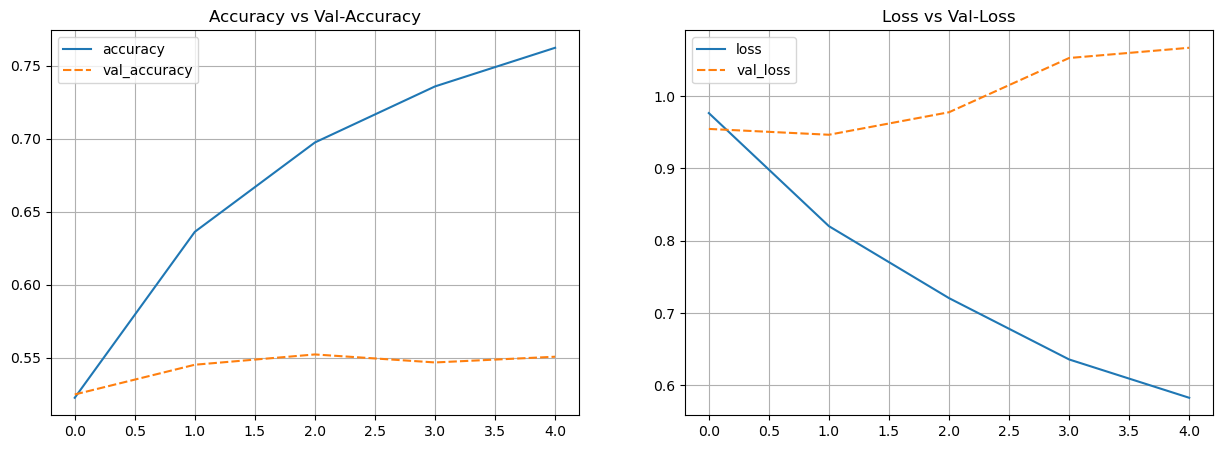

In [ ]:
# Plot Training Results

rnn_hist_df = pd.DataFrame(rnn_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=rnn_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=rnn_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

`Simple RNN 2 Evaluation`

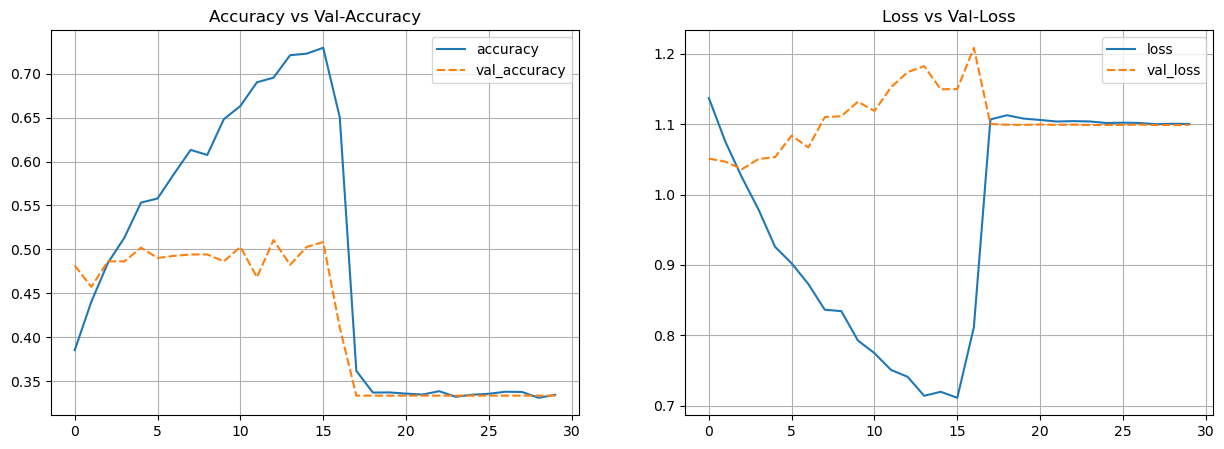

In [ ]:
# Plot Training Results

rnn1_hist_df = pd.DataFrame(rnn1_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=rnn1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=rnn1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

### 2. LSTM Evaluation

`MODEL LSTM 1 Evaluation`

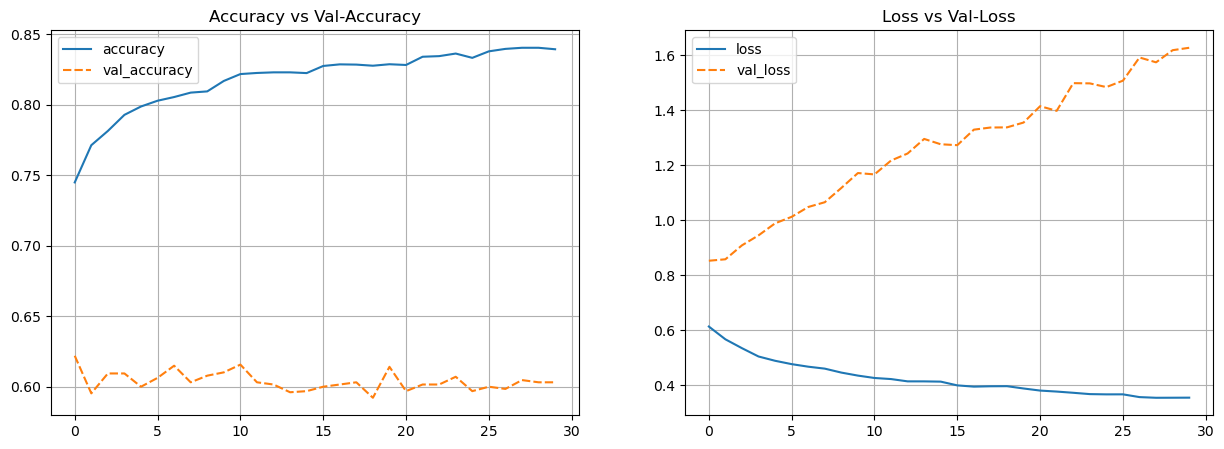

In [ ]:
# Plot Training Results

lstm1_hist_df = pd.DataFrame(lstm1_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=lstm1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=lstm1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

`MODEL LSTM 2 Evaluation`

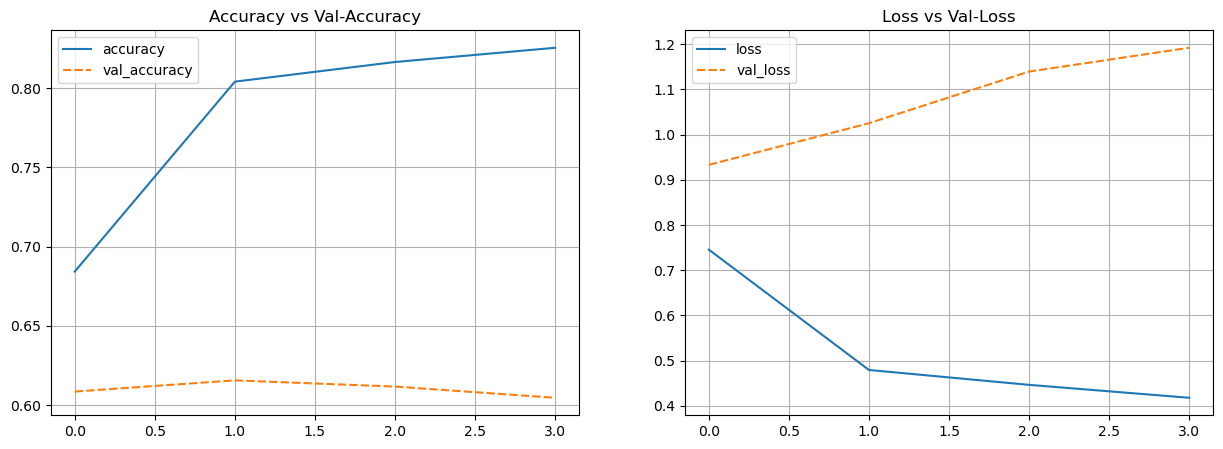

In [ ]:
# Plot Training Results

lstm2_hist_df = pd.DataFrame(lstm2_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=lstm2_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=lstm2_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

`Model LSTM 3 Evaluation`

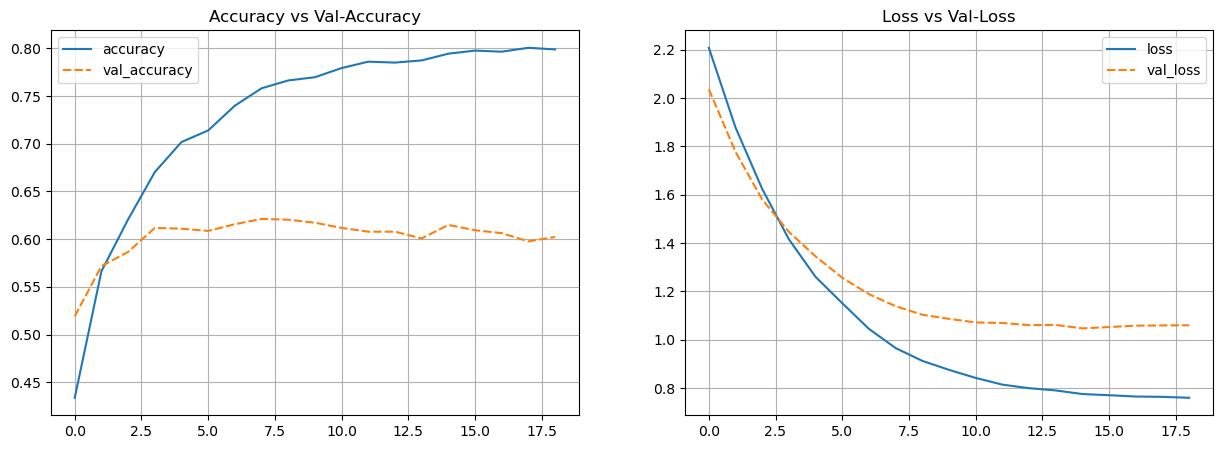

In [43]:
# Plot Training Results

lstm3_hist_df = pd.DataFrame(lstm3_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=lstm3_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=lstm3_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

`LSTM 4 Evaluation`

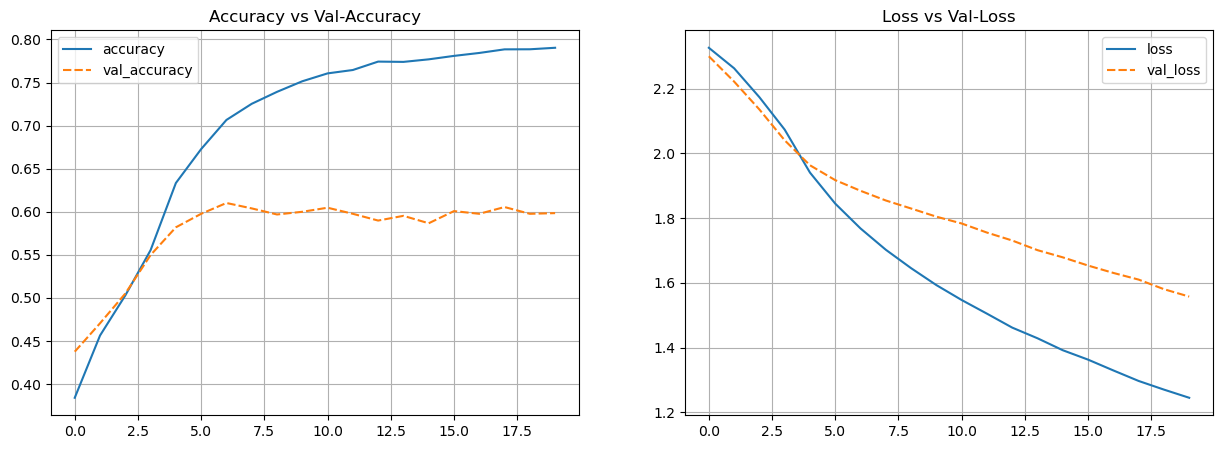

In [50]:
# Plot Training Results

lstm4_hist_df = pd.DataFrame(lstm4_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=lstm4_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=lstm4_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

### 3. GRU Evaluation

`GRU 1 Evaluation`

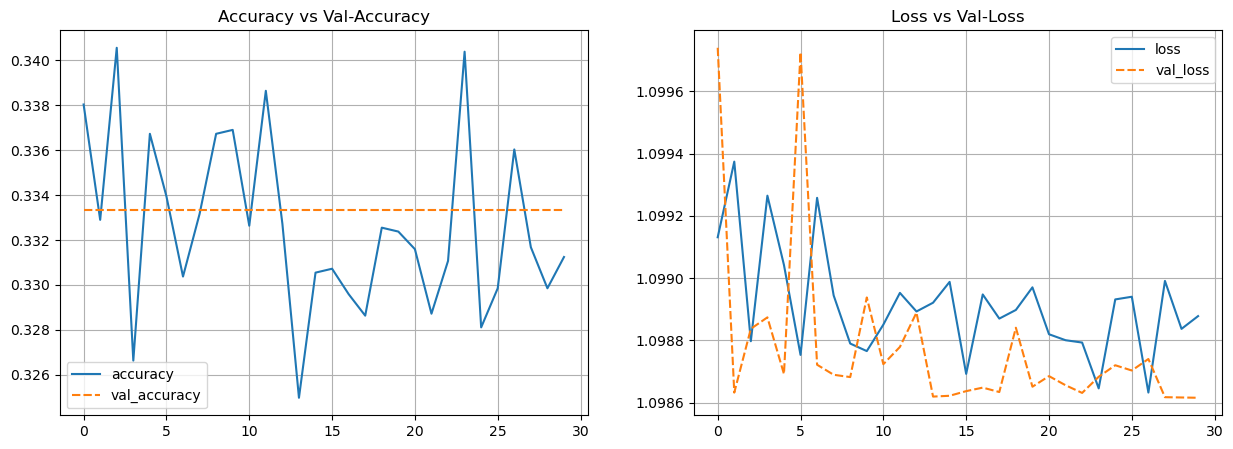

In [ ]:
# Plot Training Results

gru_hist_df = pd.DataFrame(gru_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=gru_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=gru_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

`GRU 2 Evaluation`

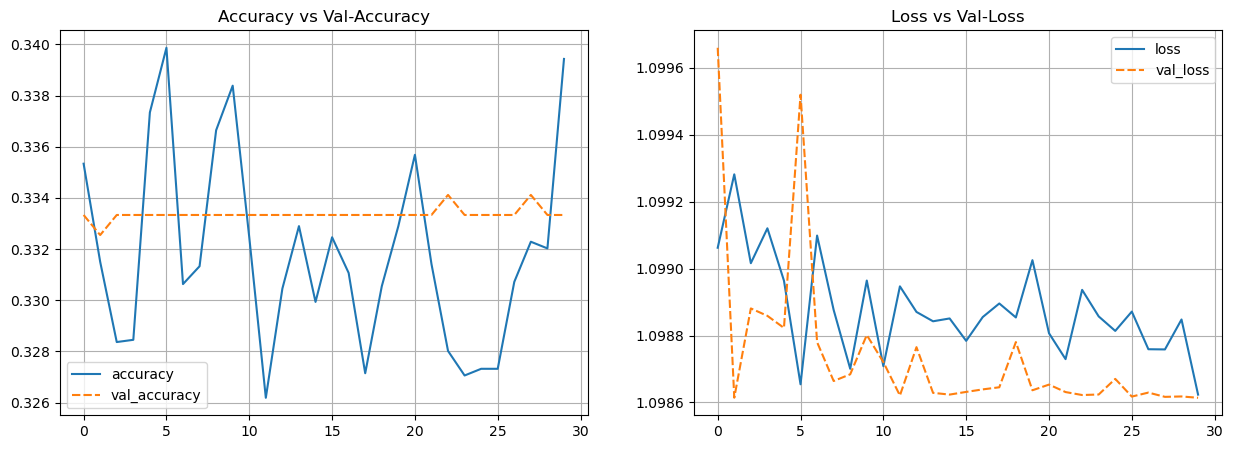

In [ ]:
# Plot Training Results

gru1_hist_df = pd.DataFrame(gru1_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=gru1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=gru1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

# **9. Model Saving**

In [107]:
# Save the model
model_lstm_4.save('model_lstm')

INFO:tensorflow:Assets written to: model_lstm\assets


INFO:tensorflow:Assets written to: model_lstm\assets


# **10. Model Inference**

`Continued in the model_inference file`

# **11. Conclusion**

>This dataset discusses Reviews on the Lazada Application from the Google Store. Where this data contains comments or user feedback when they use the application. Some of this user feedback provides negative, neutral, or positive feedback. The purpose of this feedback is to find out how the user experience is in using this application. By knowing this feedback, we can find out what needs to be developed for this lazada application and adjusted to the user's wishes. 
>
>The purpose of this modeling is to find out sentiment by entering a new sentence. Where by entering this new sentence, it will be immediately predicted whether this feedback is negative, neutral, or positive feedback. The usefulness of this predict is that we can collect feedback data to find out whether users like this application or not.
>
> From this analysis, several things are obtained, including:
>1. This dataset has a total of 775,323 rows and 8 columns
>2. Based on the visualization, the average user feedback has an amount as long as 8000 letters, which indicates that users are very encouraged to provide detailed feedback.
>3. The model used for prediction is the LSTM Model
>4. The model results still indicate overfit, this model can still be further developed by doing hyperparameter tuning, adding layers, and so on.